In [1]:
import sys
sys.path.append("../notebooks/scripts/")

# Imports Section 

In [2]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import seaborn as sns

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [3]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [4]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [5]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver
    import selenium.webdriver
    
    driver = selenium.webdriver.Chrome()
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [6]:
try:
    cross_v_thresholds = snakemake.input.cross_v_thresholds
    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata_SVM = snakemake.input.KDE_pca_metadata_SVM
    KDE_pca_metadata_cross_v = snakemake.input.KDE_pca_metadata_cross_v

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata_SVM = snakemake.input.KDE_mds_metadata_SVM
    KDE_mds_metadata_cross_v = snakemake.input.KDE_mds_metadata_cross_v

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata_SVM = snakemake.input.KDE_tsne_metadata_SVM
    KDE_tsne_metadata_cross_v = snakemake.input.KDE_tsne_metadata_cross_v

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata_SVM = snakemake.input.KDE_umap_metadata_SVM
    KDE_umap_metadata_cross_v = snakemake.input.KDE_umap_metadata_cross_v
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata_SVM = snakemake.input.KDE_genetic_metadata_SVM
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


# KDE Density Plots

In [12]:
#Charts, tree:
cross_v_thresholds = "../seasonal-flu-nextstrain/results/cross_validation_thresholds.csv"

#KDE Density:
KDE_pca = "results/KDEDensity_pca.csv"
KDE_pca_metadata_SVM = "results/KDEDensity_pca_metadata_SVM.csv"
KDE_pca_metadata_cross_v = "results/KDEDensity_pca_metadata_cross_v.csv"

KDE_mds = "results/KDEDensity_mds.csv"
KDE_mds_metadata_SVM = "results/KDEDensity_mds_metadata_SVM.csv"
KDE_mds_metadata_cross_v = "results/KDEDensity_mds_metadata_cross_v.csv"


KDE_tsne = "results/KDEDensity_t-sne.csv"
KDE_tsne_metadata_SVM = "results/KDEDensity_t-sne_metadata_SVM.csv"
KDE_tsne_metadata_cross_v = "results/KDEDensity_t-sne_metadata_cross_v.csv"

KDE_umap = "results/KDEDensity_umap.csv"
KDE_umap_metadata_SVM = "results/KDEDensity_umap_metadata_SVM.csv"
KDE_umap_metadata_cross_v = "results/KDEDensity_umap_metadata_cross_v.csv"

KDE_genetic = "results/KDEDensity_genetic.csv"
KDE_genetic_metadata_SVM = "results/KDEDensity_genetic_metadata_SVM.csv"

In [13]:
Genetic_KDE_df = pd.read_csv(KDE_genetic)
Genetic_KDE_metadata_SVM_df = pd.read_csv(KDE_genetic_metadata_SVM)
PCA_KDE_df = pd.read_csv(KDE_pca)
PCA_KDE_metadata_SVM_df = pd.read_csv(KDE_pca_metadata_SVM)
PCA_KDE_metadata_cross_v_df = pd.read_csv(KDE_pca_metadata_cross_v)
MDS_KDE_df = pd.read_csv(KDE_mds)
MDS_KDE_metadata_SVM_df = pd.read_csv(KDE_mds_metadata_SVM)
MDS_KDE_metadata_cross_v_df = pd.read_csv(KDE_mds_metadata_cross_v)
TSNE_KDE_df = pd.read_csv(KDE_tsne)
TSNE_KDE_metadata_SVM_df = pd.read_csv(KDE_tsne_metadata_SVM)
TSNE_KDE_metadata_cross_v_df = pd.read_csv(KDE_tsne_metadata_cross_v)
UMAP_KDE_df = pd.read_csv(KDE_umap)
UMAP_KDE_metadata_SVM_df = pd.read_csv(KDE_umap_metadata_SVM)
UMAP_KDE_metadata_cross_v_df = pd.read_csv(KDE_umap_metadata_cross_v)

cross_v_values = pd.read_csv(cross_v_thresholds)

In [14]:
import matplotlib.gridspec as gridspec

In [16]:
UMAP_KDE_metadata_cross_v_df

,MCC,threshold,embedding,TN,FN,TP,FP
0,0.706,-0.89,umap,82168,0,17243,12690


NameError: name 'snakemake' is not defined

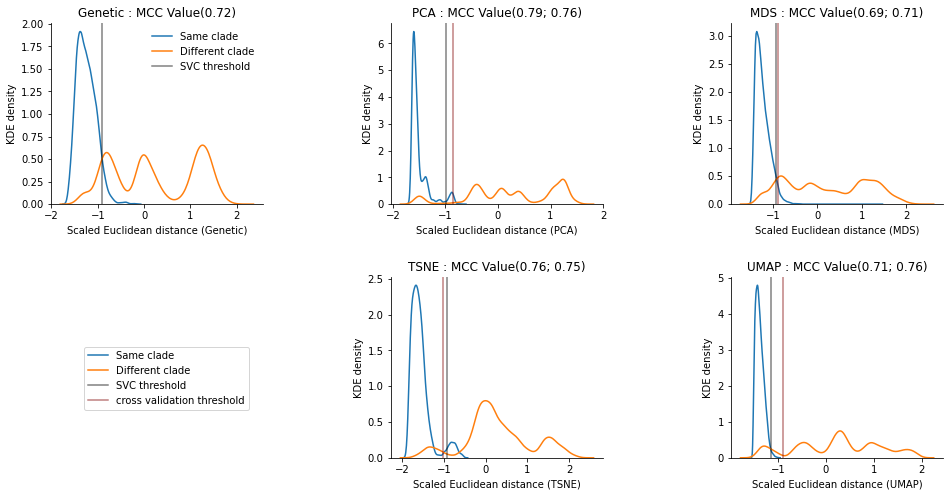

In [24]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
#legend_ax = fig.add_subplot(gs[1,0])


#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic : MCC Value(' + str(round(Genetic_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.axvline(x=cross_v_values.loc[cross_v_values['method'] == "PCA"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax2.legend(frameon=False, loc="upper right")
ax2.set_title('PCA : MCC Value(' + str(round(PCA_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " + str(round(PCA_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.axvline(x=cross_v_values.loc[cross_v_values['method'] == "MDS"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax3.legend(frameon=False, loc="upper right")
ax3.set_title('MDS : MCC Value(' + str(round(MDS_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " +  str(round(MDS_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.axvline(x=cross_v_values.loc[cross_v_values['method'] == "t-SNE"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax4.legend(frameon=False, loc="upper right")
ax4.set_title('TSNE : MCC Value(' + str(round(TSNE_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " +  str(round(TSNE_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.axvline(x=cross_v_values.loc[cross_v_values['method'] == "UMAP"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
#ax5.legend(frameon=False, loc="upper right")
ax5.set_title('UMAP : MCC Value(' + str(round(UMAP_KDE_metadata_cross_v_df["MCC"].values.tolist()[0],2)) + "; " +  str(round(UMAP_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")

handles, labels = ax5.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.15,0.2))
sns.despine()
plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')

In [270]:
node_df = pd.read_csv("results/table.tsv", sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [271]:
TSNE_df = pd.read_csv("results/clusters_t-sne.csv",index_col=0)

In [272]:
merged_tsne_df = TSNE_df.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [273]:
merged_tsne_df

,strain,tsne_x,tsne_y,t-sne_label,date,y,clade_membership
0,A/Alabama/04/2019,23.465960,34.873974,1,2019.01,55,3c3.A
1,A/Georgia/37/2018,24.100136,34.924280,1,2018.85,73,3c3.A
2,A/NorthCarolina/45/2018,24.100117,34.928173,1,2018.98,77,3c3.A
3,A/Massachusetts/04/2019,24.244019,34.689670,1,2019.04,74,3c3.A
4,A/Michigan/123/2019,24.029829,35.215168,1,2019.14,79,3c3.A
...,...,...,...,...,...,...,...
469,A/SouthAustralia/22/2018,16.069918,-5.600102,3,2018.58,188,A1
470,A/Chad/9833/2019,10.845646,-3.771298,3,2019.59,97,A3
471,A/Chad/9834/2019,10.846023,-3.774410,3,2019.59,98,A3
472,A/Perth/155/2018,10.860831,-5.505012,3,2018.75,99,A3


In [274]:
#domain = merged_umap_df["clade_membership"].drop_duplicates().values
domain =  merged_tsne_df["t-sne_label"].drop_duplicates().values

In [275]:
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e']

In [276]:
chart_12_tsne = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'t-sne_label:N', domain, range_)
domain =  merged_tsne_df["clade_membership"].drop_duplicates().values
chart_12_clade = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'clade_membership:N', domain, range_)
chart_12_tsne|chart_12_clade

alt.HConcatChart(...)

In [277]:
len(domain)

12

In [281]:
domain =  merged_tsne_df["t-sne_label"].drop_duplicates().values

In [284]:
len(merged_tsne_df["t-sne_label"].drop_duplicates().values)

4

In [285]:
node_df = pd.read_csv("results/table.tsv", sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [286]:
UMAP_df = pd.read_csv("results/clusters_umap.csv",index_col=0)

In [287]:
merged_umap_df = UMAP_df.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [288]:
merged_umap_df

,strain,umap_x,umap_y,umap_label,date,y,clade_membership
0,A/Alabama/04/2019,-5.937533,-5.792654,1,2019.01,55,3c3.A
1,A/Georgia/37/2018,-5.520044,-5.179595,1,2018.85,73,3c3.A
2,A/NorthCarolina/45/2018,-5.625260,-5.211084,1,2018.98,77,3c3.A
3,A/Massachusetts/04/2019,-4.778940,-4.924467,1,2019.04,74,3c3.A
4,A/Michigan/123/2019,-5.968284,-5.653720,1,2019.14,79,3c3.A
...,...,...,...,...,...,...,...
469,A/SouthAustralia/22/2018,5.995925,25.578424,0,2018.58,188,A1
470,A/Chad/9833/2019,6.376377,25.574224,0,2019.59,97,A3
471,A/Chad/9834/2019,6.116035,25.424130,0,2019.59,98,A3
472,A/Perth/155/2018,6.183677,25.270973,0,2018.75,99,A3


In [289]:
#domain = merged_umap_df["clade_membership"].drop_duplicates().values
domain =  merged_umap_df["umap_label"].drop_duplicates().values

In [290]:
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e']

In [291]:
chart_12_umap = scatterplot_with_tooltip_interactive(merged_umap_df,'umap_x','umap_y','umap_x','umap_y',['strain','clade_membership', 'umap_label'],'umap_label:N', domain, range_)
domain =  merged_umap_df["clade_membership"].drop_duplicates().values
chart_12_clade = scatterplot_with_tooltip_interactive(merged_umap_df,'umap_x','umap_y','umap_x','umap_y',['strain','clade_membership', 'umap_label'],'clade_membership:N', domain, range_)
chart_12_umap|chart_12_clade

alt.HConcatChart(...)

In [292]:
len(domain)

12

In [293]:
len(merged_umap_df["umap_label"].drop_duplicates().values)

4

In [294]:
node_df = pd.read_csv("results/table.tsv", sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [295]:
MDS_df = pd.read_csv("results/clusters_mds.csv",index_col=0)

In [296]:
merged_mds_df = MDS_df.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [297]:
merged_mds_df

,strain,mds1,mds2,mds_label,date,y,clade_membership
0,A/Alabama/04/2019,-13.911505,-47.033143,0,2019.01,55,3c3.A
1,A/Georgia/37/2018,-13.374424,-46.220023,0,2018.85,73,3c3.A
2,A/NorthCarolina/45/2018,-13.374424,-46.220023,0,2018.98,77,3c3.A
3,A/Massachusetts/04/2019,-13.104711,-45.184647,0,2019.04,74,3c3.A
4,A/Michigan/123/2019,-13.729177,-47.079056,0,2019.14,79,3c3.A
...,...,...,...,...,...,...,...
469,A/SouthAustralia/22/2018,-33.265080,7.770679,2,2018.58,188,A1
470,A/Chad/9833/2019,-38.780942,-5.405434,-1,2019.59,97,A3
471,A/Chad/9834/2019,26.458311,-25.229174,1,2019.59,98,A3
472,A/Perth/155/2018,-33.450929,-8.814325,-1,2018.75,99,A3


In [298]:
#domain = merged_mds_df["clade_membership"].drop_duplicates().values
domain =  merged_mds_df["mds_label"].drop_duplicates().values

In [299]:
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e']

In [300]:
len(range_)

12

In [301]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df,'mds1','mds2','mds1','mds2',['strain','clade_membership', 'mds_label'],'mds_label:N', domain, range_)
domain =  merged_mds_df["clade_membership"].drop_duplicates().values
chart_12_clade = scatterplot_with_tooltip_interactive(merged_mds_df,'mds1','mds2','mds1','mds2',['strain','clade_membership', 'mds_label'],'clade_membership:N', domain, range_)
chart_12_mds|chart_12_clade

alt.HConcatChart(...)

In [302]:
len(domain)

12

In [303]:
len(merged_mds_df["mds_label"].drop_duplicates().values)

4

In [304]:
node_df = pd.read_csv("results/table.tsv", sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [308]:
PCA_df = pd.read_csv("results/clusters_pca.csv",index_col=0)

In [309]:
merged_pca_df = PCA_df.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [310]:
merged_pca_df

,strain,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca_label,date,y,clade_membership
0,A/Alabama/04/2019,8.699978,-0.233197,0.556374,-0.088083,0.127298,-0.669286,0.197695,0.151830,0.008924,0.046284,0,2019.01,55,3c3.A
1,A/Georgia/37/2018,8.687132,-0.232288,0.551230,-0.086241,0.121450,-0.617505,0.180689,0.138950,0.006197,0.043333,0,2018.85,73,3c3.A
2,A/NorthCarolina/45/2018,8.702933,-0.233399,0.557499,-0.088451,0.128330,-0.670159,0.198938,0.154549,0.007093,0.050184,0,2018.98,77,3c3.A
3,A/Massachusetts/04/2019,8.595930,-0.226375,0.522033,-0.080169,0.115038,-0.640079,0.212313,0.165672,0.009568,0.062895,0,2019.04,74,3c3.A
4,A/Michigan/123/2019,8.688118,-0.232357,0.551617,-0.086376,0.121858,-0.620552,0.181731,0.139832,0.006246,0.043705,0,2019.14,79,3c3.A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,A/SouthAustralia/22/2018,-1.522141,0.601948,-2.193180,-0.026642,-0.151366,0.332785,0.622775,0.827936,0.316844,0.863822,2,2018.58,188,A1
470,A/Chad/9833/2019,0.388840,0.414072,-2.511551,-0.225405,0.061592,2.906961,2.546295,4.143313,-0.748805,1.188015,-1,2019.59,97,A3
471,A/Chad/9834/2019,0.388796,0.413949,-2.509786,-0.225053,0.061386,2.892687,2.531697,4.117176,-0.742893,1.177878,-1,2019.59,98,A3
472,A/Perth/155/2018,0.518330,0.301584,-2.417163,-0.155718,0.086364,2.736215,2.231955,3.488381,-0.894396,1.490079,-1,2018.75,99,A3


In [311]:
#domain = merged_mds_df["clade_membership"].drop_duplicates().values
domain =  merged_pca_df["pca_label"].drop_duplicates().values

In [312]:
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e']

In [313]:
chart_12_pca = scatterplot_with_tooltip_interactive(merged_pca_df,'pca1','pca2','pca1','pca2',['strain','clade_membership', 'pca_label'],'pca_label:N', domain, range_)
domain =  merged_pca_df["clade_membership"].drop_duplicates().values
chart_12_clade = scatterplot_with_tooltip_interactive(merged_pca_df,'pca1','pca2','pca1','pca2',['strain','clade_membership', 'pca_label'],'clade_membership:N', domain, range_)
chart_12_pca|chart_12_clade

alt.HConcatChart(...)

In [314]:
len(domain)

12

In [315]:
len(merged_pca_df["pca_label"].drop_duplicates().values)

5

In [316]:
merged_df = node_df[["strain", "date", "clade_membership", "y"]].merge(
    PCA_df,
    on="strain"
).merge(
    MDS_df,
    on="strain"
).merge(
    TSNE_df,
    on="strain"
).merge(
    UMAP_df,
    on="strain"
)

In [317]:
merged_df.shape

(474, 24)

In [318]:
merged_df.head()

,strain,date,clade_membership,y,pca1,pca2,pca3,pca4,pca5,pca6,...,pca_label,mds1,mds2,mds_label,tsne_x,tsne_y,t-sne_label,umap_x,umap_y,umap_label
0,A/Minnesota/40/2018,2018.54,3c3.A,1,5.717516,-0.534256,-0.497468,0.549360,-0.530084,2.609003,...,0,1.731531,-37.993524,0,32.721910,30.441605,1,-4.356308,-6.223537,1
1,A/Ohio/23/2018,2018.52,3c3.A,2,7.120403,-0.129222,-0.023933,0.085935,-0.344810,2.532479,...,0,-10.156200,-38.015921,0,32.060913,29.882458,1,-4.184479,-6.056691,1
2,A/Florida/83/2018,2018.68,3c3.A,3,7.125017,-0.139267,-0.045657,0.089958,-0.385246,2.576028,...,0,-19.730648,-38.545191,0,32.355244,29.539797,1,-4.304934,-6.166585,1
3,A/England/7208/2018,2018.26,3c3.A,4,7.489240,-0.160524,0.103371,0.053782,-0.293458,2.516753,...,0,-13.548987,-39.589870,0,31.869913,29.807240,1,-4.002865,-5.951473,1
4,A/Perth/1001/2018,2018.43,3c3.A,5,7.571845,-0.156671,0.125477,0.050609,-0.284053,2.393823,...,0,-11.104253,-39.937364,0,31.510366,29.995174,1,-3.814000,-5.682019,1


In [319]:
explained_df = pd.read_csv("results/explained_variance_pca.csv")
explained_df

,explained variance,principal components
0,0.4754,1
1,0.1813,2
2,0.0768,3
3,0.0345,4
4,0.0161,5
5,0.0110,6
6,0.0094,7
7,0.0086,8
8,0.0068,9
9,0.0063,10


In [320]:
data = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2','tsne_x', 'tsne_y', 'pca1', 'pca2', 'umap_x', 'umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_df["explained variance"][0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_df["explained variance"][1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain','clade_membership'],
    domain,
    range_
)

In [321]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.hconcat(data[0],embeddings)

In [322]:
fullChart

alt.HConcatChart(...)

In [323]:
chart1 = chart_12_pca|chart_12_mds
chart2 = chart_12_tsne|chart_12_umap

alt.vconcat(chart1, chart2)

alt.VConcatChart(...)